In [1]:
from utils import set_root, PhysioLoader
import math

set_root()
%cd ..

/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


Current working directory: /home/manni/physioex
/home/manni


/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [12]:
# importing
from utils import PhysioLoader
import numpy as np
from loguru import logger
import os

from physioex.train.networks import config
from physioex.data import datasets

from tqdm import tqdm
import torch
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from loguru import logger

logger.remove()

In [13]:
models = ["seqsleepnet_cem"]
dataset = {"name": "dreem", "version": "dodh"}
seqlen = 3
loss = "cel"
batch_size = 32

sleep_stages = ["Awake", "N1", "N2", "N3", "REM"]
if dataset["name"] == "mitdb":
    sleep_stages = ["N", "S", "V", "F", "Q"]

labels_idx = np.arange(len(sleep_stages)).astype(int)
labels_idx_concept = np.arange(len(sleep_stages)).astype(int)

100%|██████████| 68/68 [00:00<00:00, 121.53it/s]
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(6474,) (6474,) (6474,) (6474,)


100%|██████████| 52/52 [00:00<00:00, 117.03it/s]
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(4989,) (4989,) (4989,) (4989,)


100%|██████████| 61/61 [00:00<00:00, 120.61it/s]
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(5778,) (5778,) (5778,) (5778,)


100%|██████████| 62/62 [00:00<00:00, 121.23it/s]
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(5928,) (5928,) (5928,) (5928,)


100%|██████████| 63/63 [00:00<00:00, 102.96it/s]
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(5961,) (5961,) (5961,) (5961,)


100%|██████████| 62/62 [00:00<00:00, 65.06it/s] 
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(5946,) (5946,) (5946,) (5946,)


100%|██████████| 64/64 [00:00<00:00, 102.65it/s]
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(6060,) (6060,) (6060,) (6060,)


100%|██████████| 60/60 [00:00<00:00, 98.96it/s]
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

(5703,) (5703,) (5703,) (5703,)


100%|██████████| 62/62 [00:00<00:00, 97.95it/s] 
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(5862,) (5862,) (5862,) (5862,)


100%|██████████| 65/65 [00:00<00:00, 100.59it/s]
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/manni/miniconda3/envs/physioex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

(6222,) (6222,) (6222,) (6222,)
Accuracy: 93.12% +/- 3.55%
Accuracy concept: 69.50% +/- 6.48%


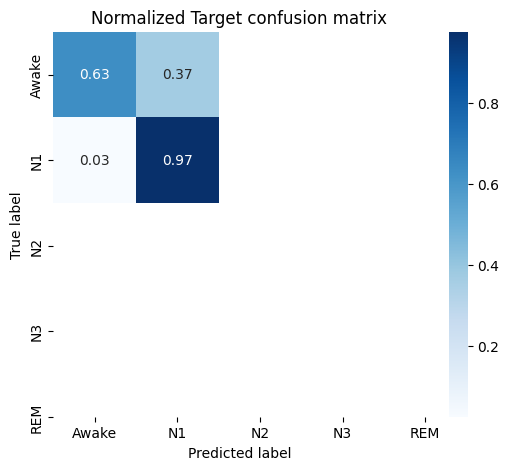

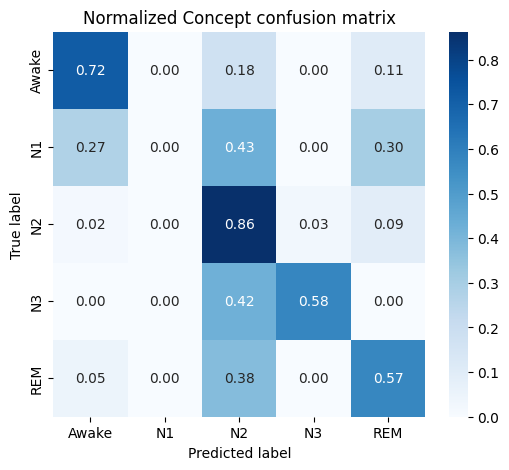

In [16]:
for model in models:

    if dataset["version"] is None:
        ckp_path = f"models/cel/{model}/seqlen={seqlen}/{dataset['name']}"
    else:
        ckp_path = (
            f"models/cel/{model}/seqlen={seqlen}/{dataset['name']}/{dataset['version']}"
        )
    ckp_path = "models/binary_end_c8"

    loader = PhysioLoader(
        model_name=model,
        loss_name=loss,
        ckp_path=ckp_path,
        dataset_name=dataset["name"],
        version=dataset["version"],
        use_cache=True,
        sequence_lenght=seqlen,
        batch_size=batch_size,
    )

    acc = []
    acc_concept = []

    cm = []
    cm_concept = []

    reports = []
    reports_concept = []

    for i in range(len(loader.checkpoints)):
        model, _, _, test_loader = loader.get_fold(i)
        y_pred = []
        y_true = []
        act_pred = []
        act_true = []

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Imposta il modello in modalità di valutazione
        model = model.eval().to(device)

        outputs = []
        activations = []
        # Disabilita il calcolo del gradiente
        with torch.no_grad():
            # Aggiungi tqdm per mostrare il progresso
            
            for inputs, labels in tqdm(test_loader):
                # Calcola le previsioni del modello
                concepts, bo = model.encode(inputs.to(device))
                emb, act = concepts
                activations.extend(act.cpu().detach().squeeze())

                outputs.extend(model(inputs.to(device)).cpu().detach())
                y_true.extend(labels.cpu().detach())
                act_true.extend(labels.cpu().detach())

        outputs = torch.stack(outputs)
        activations = torch.stack(activations)

        y_true = torch.stack(y_true)
        act_true = torch.stack(act_true)

        y_pred = torch.argmax(outputs, dim=len(outputs.size()) - 1)
        act_pred = torch.argmax(activations, dim=len(activations.size()) - 1)

        if len(y_pred.size()) == 2:
            y_pred = y_pred.reshape(-1)
            y_true = y_true.reshape(-1)
            act_pred = act_pred.reshape(-1)
            act_true = act_true.reshape(-1)

        y_true = y_true.numpy()
        act_true = act_true.numpy()
        y_pred = y_pred.numpy()
        act_pred = act_pred.numpy()

        #temp, finchè non ci sono le attivazioni vere
        if(model.n_classes == 2):
            #mette al posto di 2,3,4 il valore 1
            y_true[(y_true == 2) | (y_true == 3) | (y_true == 4)] = 1
            labels_idx = np.arange(2).astype(int)
        else:
            y_true = y_true
            
        print(y_true.shape, y_pred.shape, act_true.shape, act_pred.shape)

        acc.append(accuracy_score(y_true, y_pred))
        acc_concept.append(accuracy_score(act_true, act_pred))
        cm.append(confusion_matrix(y_true, y_pred, labels=labels_idx))
        cm_concept.append(confusion_matrix(act_true, act_pred, labels=labels_idx_concept))

        reports.append(classification_report(y_true, y_pred))
        reports_concept.append(classification_report(act_true, act_pred))

    acc = np.array(acc)
    cm = np.array(cm)

    acc_concept = np.array(acc_concept)
    cm_concept = np.array(cm_concept)

    print(f"Accuracy: {acc.mean() * 100:.2f}% +/- {acc.std() * 100:.2f}%")
    print(f"Accuracy concept: {acc_concept.mean() * 100:.2f}% +/- {acc_concept.std() * 100:.2f}%")

    cm_mean = cm.mean(axis=0)
    cm_mean = cm_mean.astype("float") / cm_mean.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_mean,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=sleep_stages,
        yticklabels=sleep_stages,
    )
    plt.title("Normalized Target confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    cm_concept_mean = cm_concept.mean(axis=0)
    cm_concept_mean = cm_concept_mean.astype("float") / cm_concept_mean.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_concept_mean,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=sleep_stages,
        yticklabels=sleep_stages,
    )
    plt.title("Normalized Concept confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()




In [ ]:
#script to extract the mean of loss cross validation values from the csv files

import csv

def extract_column(csv_file, column_name):
    values = []
    steps = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row[column_name]:  # Check if the value in the specified column is not empty
                value = (round(float(row[column_name]), 3))
                epoch = int(row['epoch'])
                values.append((epoch, value))
    return values

# Example usage:
versions = [0,1,2,3,4,5,6,7,8,9]
column_name = 'val_loss_target'
model = 'binary_mod1_c8'
column_values_matrix = []
for ver in versions:
    csv_file = 'lightning_logs/' + model + '/version_'+ str(ver) +'/metrics.csv'
    column_values = extract_column(csv_file, column_name)
    print("(" + ")(".join([f"{epoch},{value}" for epoch, value in column_values]) + ")")
    column_values_matrix.append(column_values)

num_columns = len(column_values_matrix[0])
column_sums = [0] * num_columns
for row in column_values_matrix:
    for col_idx, (_, value) in enumerate(row):
        column_sums[col_idx] += value
column_means = [(constant[0], round(sum / len(column_values_matrix),3)) for constant, sum in zip(column_values_matrix[0][0:num_columns], column_sums)]

output = "(" + ")(".join([f"{epoch},{value}" for epoch, value in column_means]) + ")"
print("\n" +output)

(0,0.428)(1,0.347)(2,0.326)(3,0.337)(4,0.327)(5,0.335)(6,0.302)(7,0.32)(8,0.316)(9,0.335)(10,0.293)(11,0.324)(12,0.324)(13,0.318)(14,0.333)(15,0.316)(16,0.356)(17,0.376)(18,0.368)(19,0.395)
(0,0.266)(1,0.17)(2,0.166)(3,0.163)(4,0.156)(5,0.149)(6,0.153)(7,0.155)(8,0.156)(9,0.162)(10,0.163)(11,0.17)(12,0.209)(13,0.179)(14,0.234)(15,0.219)(16,0.193)(17,0.188)(18,0.22)(19,0.254)
(0,0.503)(1,0.372)(2,0.314)(3,0.314)(4,0.283)(5,0.261)(6,0.34)(7,0.286)(8,0.264)(9,0.254)(10,0.253)(11,0.335)(12,0.29)(13,0.308)(14,0.27)(15,0.294)(16,0.3)(17,0.311)(18,0.294)(19,0.3)
(0,0.319)(1,0.196)(2,0.174)(3,0.175)(4,0.172)(5,0.176)(6,0.178)(7,0.176)(8,0.179)(9,0.18)(10,0.177)(11,0.177)(12,0.181)(13,0.185)(14,0.201)(15,0.19)(16,0.208)(17,0.212)(18,0.24)(19,0.22)
(0,0.328)(1,0.179)(2,0.172)(3,0.183)(4,0.297)(5,0.18)(6,0.202)(7,0.206)(8,0.195)(9,0.218)(10,0.207)(11,0.202)(12,0.227)(13,0.215)(14,0.224)(15,0.231)(16,0.217)(17,0.282)(18,0.248)(19,0.218)
(0,0.27)(1,0.176)(2,0.168)(3,0.172)(4,0.171)(5,0.162)(6,0.169